In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import MaxNLocator

In [2]:
df_neuMF_end = pd.read_csv('/data/lab/a3/results/NeuMF-end_results.csv')
df_neuMF_pre = pd.read_csv('/data/lab/a3/results/NeuMF-pre_results.csv')
df_MLP_1 = pd.read_csv('/data/lab/a3/results/MLP_1.csv')
df_MLP_2 = pd.read_csv('/data/lab/a3/results/MLP_2.csv')
df_MLP_3 = pd.read_csv('/data/lab/a3/results/MLP_3.csv')
df_MLP_4 = pd.read_csv('/data/lab/a3/results/MLP_4.csv')
df_GMF = pd.read_csv('/data/lab/a3/results/GMF.csv')

In [3]:
# 为了绘制到同一个图中，需要在DataFrame中加入一个列来标识不同的模型
df_neuMF_end['Model'] = 'NeuMF-end'
df_MLP_1['Model'] = 'MLP_1'
df_MLP_2['Model'] = 'MLP_2'
df_MLP_3['Model'] = 'MLP_3'
df_GMF['Model'] = 'GMF'
# 合并三个DataFrame
df_all = pd.concat([df_neuMF_end, df_GMF, df_MLP_1,df_MLP_2])
df_all

,Epoch,Loss,HR@10,NDCG@10,Model
0,1,0.225,0.633,0.363,NeuMF-end
1,2,0.288,0.675,0.395,NeuMF-end
2,3,0.336,0.684,0.409,NeuMF-end
3,4,0.255,0.693,0.417,NeuMF-end
4,5,0.271,0.692,0.417,NeuMF-end
...,...,...,...,...,...
15,16,0.222,0.678,0.407,MLP_2
16,17,0.128,0.674,0.404,MLP_2
17,18,0.197,0.679,0.406,MLP_2
18,19,0.172,0.675,0.403,MLP_2


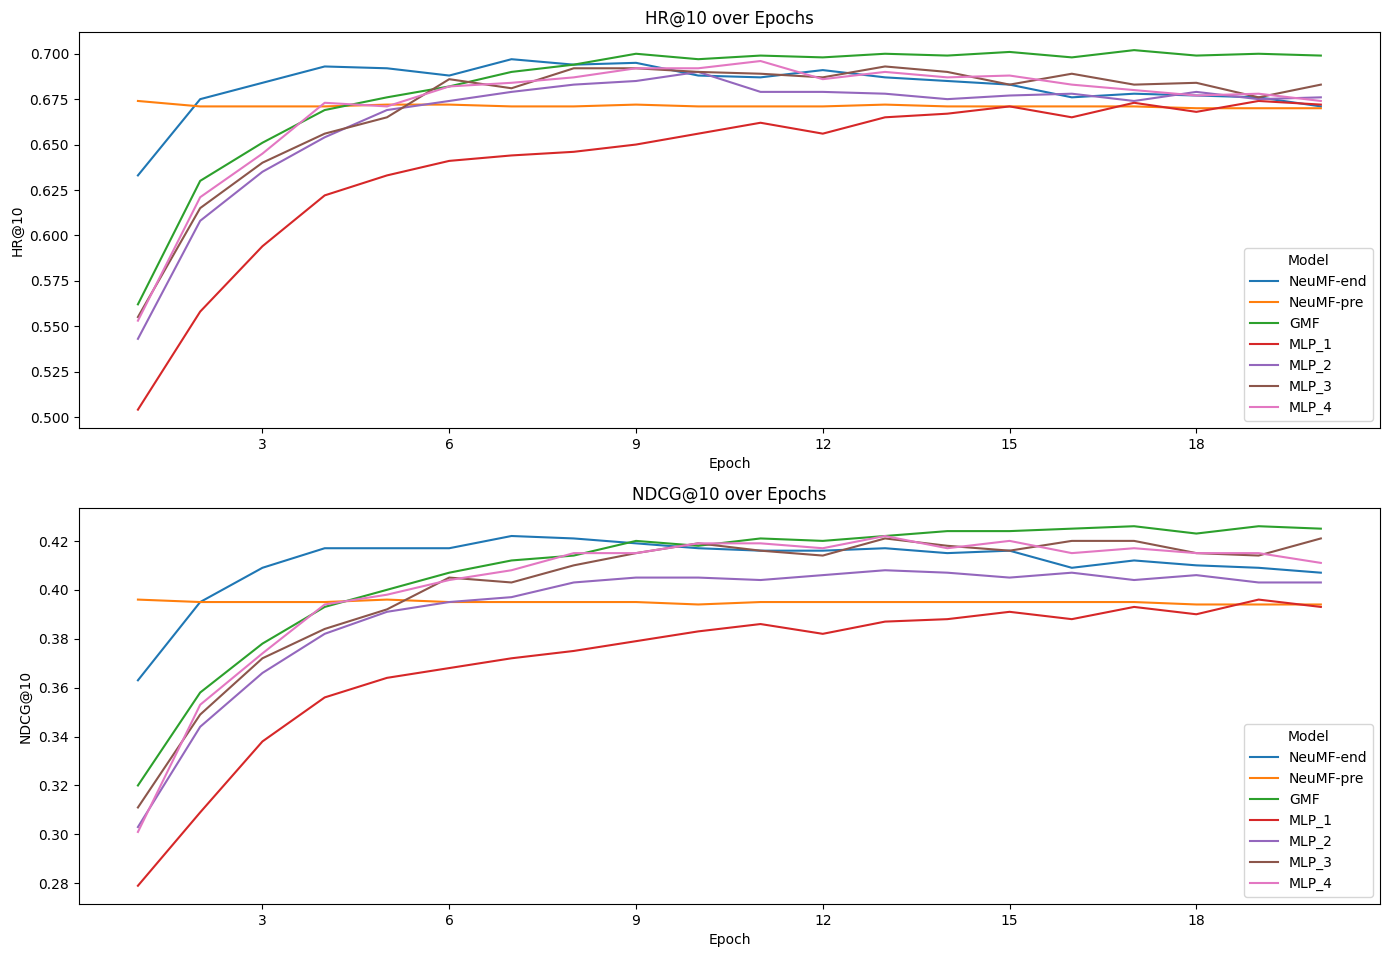

In [5]:
df_neuMF_end['Model'] = 'NeuMF-end'
df_neuMF_pre['Model'] = 'NeuMF-pre'
df_MLP_1['Model'] = 'MLP_1'
df_MLP_2['Model'] = 'MLP_2'
df_MLP_3['Model'] = 'MLP_3'
df_MLP_4['Model'] = 'MLP_4'
df_GMF['Model'] = 'GMF'

# 合并 DataFrame
df_all = pd.concat([df_neuMF_end,df_neuMF_pre, df_GMF, df_MLP_1, df_MLP_2,df_MLP_3,df_MLP_4])

plt.figure(figsize=(14, 14))

# 绘制 HR@10
plt.subplot(3, 1, 1)
sns.lineplot(data=df_all, x='Epoch', y='HR@10', hue='Model')
plt.title('HR@10 over Epochs')
plt.xlabel('Epoch')
plt.ylabel('HR@10')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))


# 绘制 NDCG@10
plt.subplot(3, 1, 2)
sns.lineplot(data=df_all, x='Epoch', y='NDCG@10', hue='Model')
plt.title('NDCG@10 over Epochs')
plt.xlabel('Epoch')
plt.ylabel('NDCG@10')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))


# 绘制 Loss
# plt.subplot(3, 1, 3)
# sns.lineplot(data=df_all, x='Epoch', y='Loss', hue='Model')
# plt.title('Loss over Epochs')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

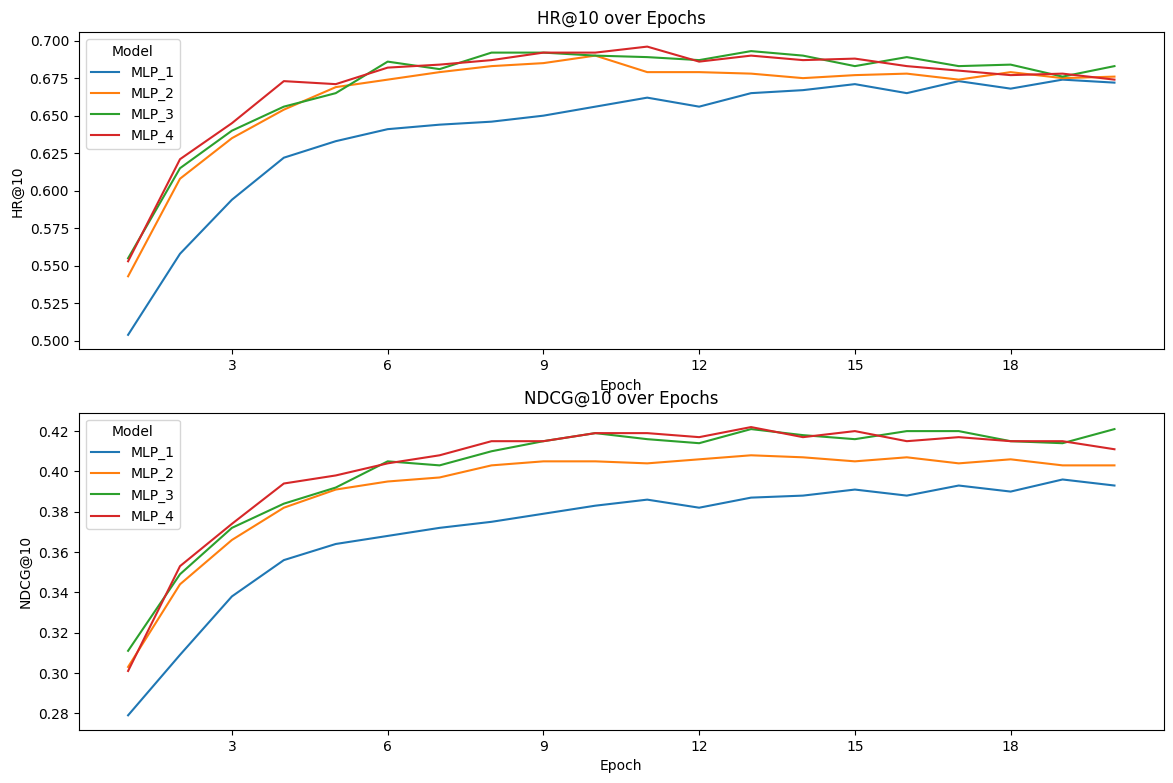

In [81]:
df_MLP = pd.concat([df_MLP_1, df_MLP_2,df_MLP_3,df_MLP_4])
# ,df_MLP_3,df_MLP_4

plt.figure(figsize=(14, 14))

# 绘制 HR@10
plt.subplot(3, 1, 1)
sns.lineplot(data=df_MLP, x='Epoch', y='HR@10', hue='Model')
plt.title('HR@10 over Epochs')
plt.xlabel('Epoch')
plt.ylabel('HR@10')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# 绘制 NDCG@10
plt.subplot(3, 1, 2)
sns.lineplot(data=df_MLP, x='Epoch', y='NDCG@10', hue='Model')
plt.title('NDCG@10 over Epochs')
plt.xlabel('Epoch')
plt.ylabel('NDCG@10')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

In [93]:
df_MLP_mean = df_MLP.groupby('Model').mean().reset_index()
print(df_MLP_mean)

   Model  Epoch    Loss    HR@10  NDCG@10
0  MLP_1   10.5  0.2719  0.64105  0.37085
1  MLP_2   10.5  0.2352  0.66450  0.39220
2  MLP_3   10.5  0.2442  0.67145  0.40175
3  MLP_4   10.5  0.2382  0.67195  0.40245


In [94]:
df_all_mean = df_all.groupby('Model').mean().reset_index()
print(df_all_mean)

       Model  Epoch     Loss    HR@10  NDCG@10
0        GMF   10.5  0.24105  0.68230  0.40780
1      MLP_1   10.5  0.27190  0.64105  0.37085
2      MLP_2   10.5  0.23520  0.66450  0.39220
3      MLP_3   10.5  0.24420  0.67145  0.40175
4      MLP_4   10.5  0.23820  0.67195  0.40245
5  NeuMF-end   10.5  0.21290  0.68250  0.41120
6  NeuMF-pre   10.5  0.24800  0.67120  0.39490


/tmp/ipykernel_86610/1104983755.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_MLP_mean, x='Model', y='HR@10', palette='Blues')


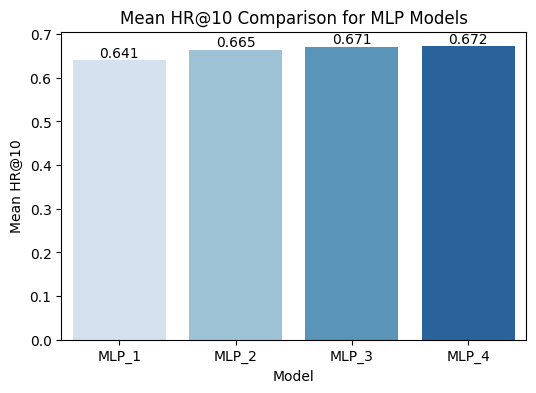

/tmp/ipykernel_86610/1104983755.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_MLP_mean, x='Model', y='NDCG@10', palette='Reds')


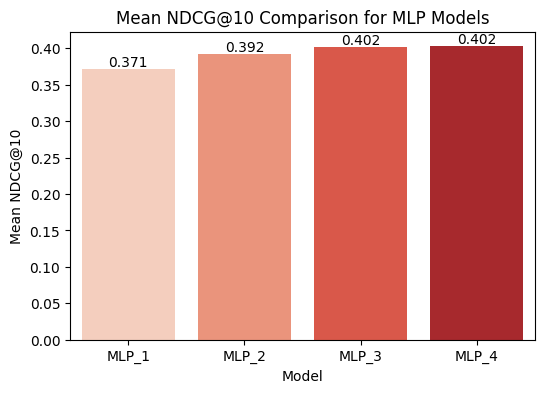

In [84]:
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=df_MLP_mean, x='Model', y='HR@10', palette='Blues')
plt.title('Mean HR@10 Comparison for MLP Models')
plt.xlabel('Model')
plt.ylabel('Mean HR@10')

# 添加每个条形图的数值标签
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')

plt.show()

plt.figure(figsize=(6, 4))
ax = sns.barplot(data=df_MLP_mean, x='Model', y='NDCG@10', palette='Reds')
plt.title('Mean NDCG@10 Comparison for MLP Models')
plt.xlabel('Model')
plt.ylabel('Mean NDCG@10')

# 添加每个条形图的数值标签
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')

plt.show()


/tmp/ipykernel_86610/3544600998.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_all_mean, x='Model', y='HR@10', palette='Blues')


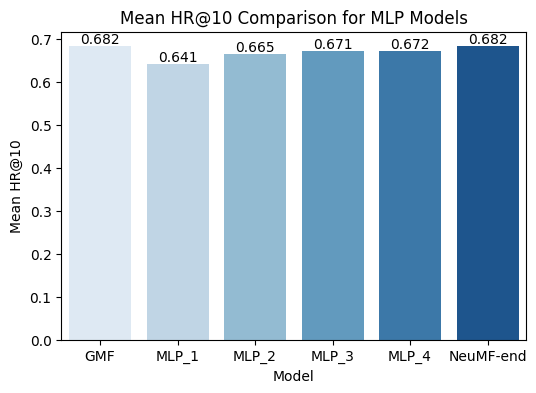

/tmp/ipykernel_86610/3544600998.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_all_mean, x='Model', y='NDCG@10', palette='Reds')


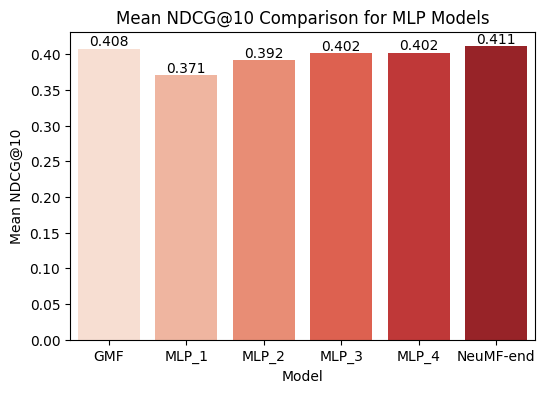

In [85]:
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=df_all_mean, x='Model', y='HR@10', palette='Blues')
plt.title('Mean HR@10 Comparison for MLP Models')
plt.xlabel('Model')
plt.ylabel('Mean HR@10')

# 添加每个条形图的数值标签
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
plt.show()


plt.figure(figsize=(6, 4))
ax = sns.barplot(data=df_all_mean, x='Model', y='NDCG@10', palette='Reds')
plt.title('Mean NDCG@10 Comparison for MLP Models')
plt.xlabel('Model')
plt.ylabel('Mean NDCG@10')

# 添加每个条形图的数值标签
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')

plt.show()